# Price prediction of affordable and accessible Airbnb properties in Singapore

### In this project, I will be creating a predictive model to predict the prices of AirBnb services in Singapore as of 27 Feb 2020. The dataset is obtained from the Airbnb website as below:
### http://data.insideairbnb.com/singapore/sg/singapore/2020-02-27/visualisations/listings.csv
 

# **Exploratory Data Analysis of dataset**

##### Obtain required dataset


In [1]:
!wget https://raw.githubusercontent.com/aziz0519/Advanced-Data-Science-Capstone-Project/master/listings.csv

--2020-03-24 12:00:46--  https://raw.githubusercontent.com/aziz0519/Advanced-Data-Science-Capstone-Project/master/listings.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1188761 (1.1M) [text/plain]
Saving to: ‘listings.csv’

listings.csv        100%[===================>]   1.13M  --.-KB/s    in 0.09s   

2020-03-24 12:00:46 (13.1 MB/s) - ‘listings.csv’ saved [1188761/1188761]



In [2]:
!pip install pyspark

     |████████████████████████████████| 217.8MB 58kB/s 
     |████████████████████████████████| 204kB 47.7MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.5-py2.py3-none-any.whl size=218257927 sha256=3bfc65b9c67ad2527474e22bdf1ec841ad57876991608a916d793eeca0d49662
  Stored in directory: /root/.cache/pip/wheels/bf/db/04/61d66a5939364e756eb1c1be4ec5bdce6e04047fc7929a3c3c
Successfully built pyspark


In [0]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext, SparkSession
from pyspark.sql.types import StructType, StructField, DoubleType, IntegerType, StringType
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .getOrCreate()

In [4]:
spark.version

'2.4.5'

In [0]:
rdd = sc.textFile('listings.csv')
df = spark.read.csv(rdd,header=True)

In [6]:
df.createOrReplaceTempView('listings')
df.show()

+------+--------------------+-------+-------------+-------------------+-------------+--------+---------+------------+-----+--------------+-----------------+-----------+-----------------+------------------------------+----------------+
|    id|                name|host_id|    host_name|neighbourhood_group|neighbourhood|latitude|longitude|   room_type|price|minimum_nights|number_of_reviews|last_review|reviews_per_month|calculated_host_listings_count|availability_365|
+------+--------------------+-------+-------------+-------------------+-------------+--------+---------+------------+-----+--------------+-----------------+-----------+-----------------+------------------------------+----------------+
| 49091|COZICOMFORT LONG ...| 266763|    Francesca|       North Region|    Woodlands| 1.44255| 103.7958|Private room|   84|           180|                1| 2013-10-21|             0.01|                             2|             365|
| 50646|Pleasant Room alo...| 227796|      Sujatha|     Cent

In [7]:
print(df.printSchema())

root
 |-- id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- host_id: string (nullable = true)
 |-- host_name: string (nullable = true)
 |-- neighbourhood_group: string (nullable = true)
 |-- neighbourhood: string (nullable = true)
 |-- latitude: string (nullable = true)
 |-- longitude: string (nullable = true)
 |-- room_type: string (nullable = true)
 |-- price: string (nullable = true)
 |-- minimum_nights: string (nullable = true)
 |-- number_of_reviews: string (nullable = true)
 |-- last_review: string (nullable = true)
 |-- reviews_per_month: string (nullable = true)
 |-- calculated_host_listings_count: string (nullable = true)
 |-- availability_365: string (nullable = true)

None


In [0]:
df.registerTempTable("listings")

#### As I would want to do a thorough analysis on the dataset, I will revert to conventional Python libraries to the data exploration and extract meaningful insights from the data.

In [0]:
import pandas as pd
import numpy as np

In [0]:
df_listings = pd.read_csv('listings.csv')

In [11]:
df_listings.shape

(8047, 16)

In [12]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8047 entries, 0 to 8046
Data columns (total 16 columns):
id                                8047 non-null int64
name                              8045 non-null object
host_id                           8047 non-null int64
host_name                         8047 non-null object
neighbourhood_group               8047 non-null object
neighbourhood                     8047 non-null object
latitude                          8047 non-null float64
longitude                         8047 non-null float64
room_type                         8047 non-null object
price                             8047 non-null int64
minimum_nights                    8047 non-null int64
number_of_reviews                 8047 non-null int64
last_review                       5120 non-null object
reviews_per_month                 5120 non-null float64
calculated_host_listings_count    8047 non-null int64
availability_365                  8047 non-null int64
dtypes: float64(3

In [13]:
df_listings.describe()

id  ...  availability_365
count  8.047000e+03  ...       8047.000000
mean   2.622832e+07  ...        220.874115
std    1.176525e+07  ...        147.731172
min    4.909100e+04  ...          0.000000
25%    1.686457e+07  ...         75.000000
50%    2.811631e+07  ...        297.000000
75%    3.672920e+07  ...        363.000000
max    4.257871e+07  ...        365.000000

[8 rows x 10 columns]

In [0]:
#Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('white')

In [0]:
#import statistical libraries
from scipy.stats import norm,skew, boxcox_normmax

/usr/local/lib/python3.6/dist-packages/seaborn/utils.py:287: UserWarning: Use the colorbar set_ticks() method instead.
  ax_i.set_yticks(newticks)


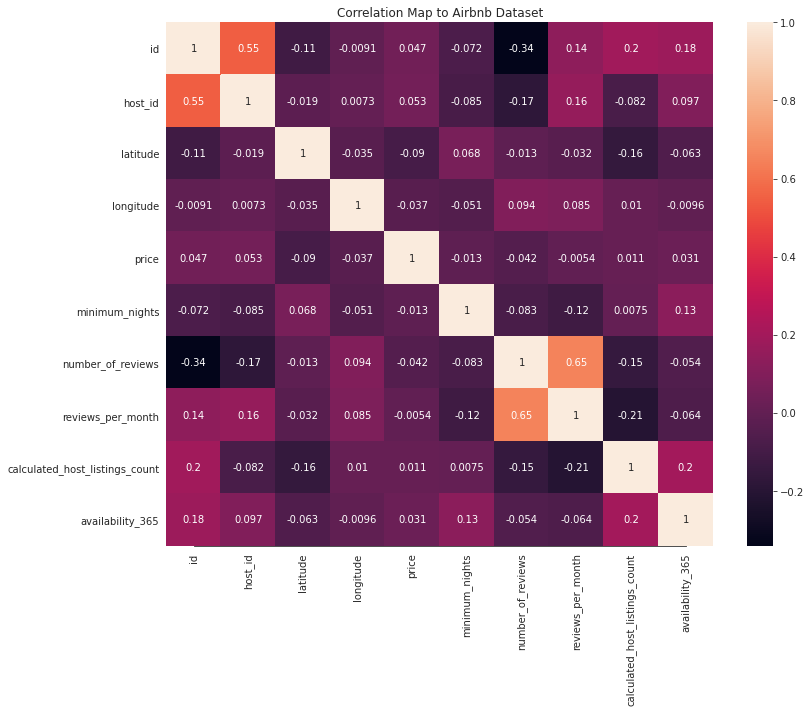

In [16]:
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(df_listings.corr(), annot=True)
ax.set(title='Correlation Map to Airbnb Dataset')
ax.xaxis.grid(False)
sns.despine(left=True,trim=True)
plt.tight_layout()
plt.show()


 mu = 170.213371 and sigma = 320.309329



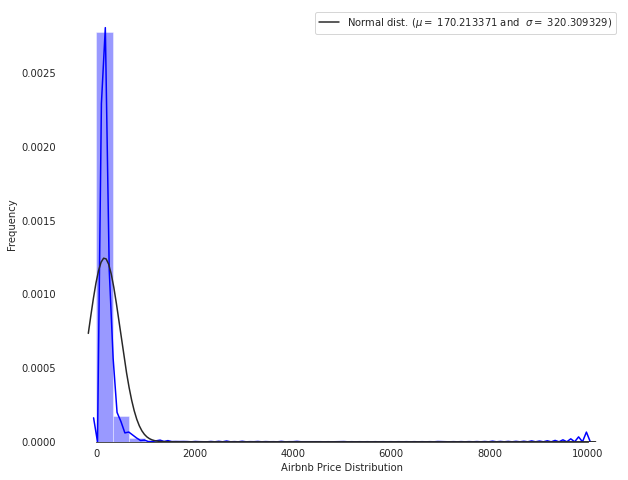

In [17]:
sns.set_palette('deep')
f,ax = plt.subplots(figsize=(10,8))
sns.distplot(df_listings['price'],fit=norm,color='b',bins=30)
(mu,sigma) = norm.fit(df_listings['price'])
print('\n mu = {:2f} and sigma = {:2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:2f} and  $\sigma=$ {:2f})'.format(mu, sigma)], loc='best')
ax.xaxis.grid(False)
ax.set(ylabel='Frequency')
ax.set(xlabel='Airbnb Price Distribution')
sns.despine(trim=True,left=True)
plt.show()


 mu = 13.762147 and sigma = 32.689875



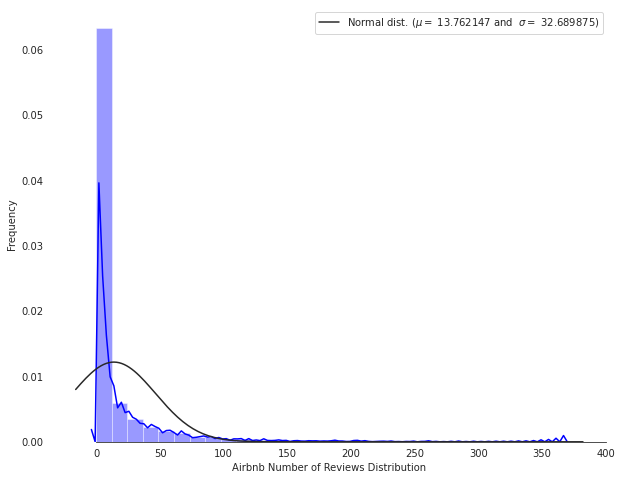

In [18]:
sns.set_palette('deep')
f,ax = plt.subplots(figsize=(10,8))
sns.distplot(df_listings['number_of_reviews'],fit=norm,color='b',bins=30)
(mu,sigma) = norm.fit(df_listings['number_of_reviews'])
print('\n mu = {:2f} and sigma = {:2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:2f} and  $\sigma=$ {:2f})'.format(mu, sigma)], loc='best')
ax.xaxis.grid(False)
ax.set(ylabel='Frequency')
ax.set(xlabel='Airbnb Number of Reviews Distribution')
sns.despine(trim=True,left=True)
plt.show()

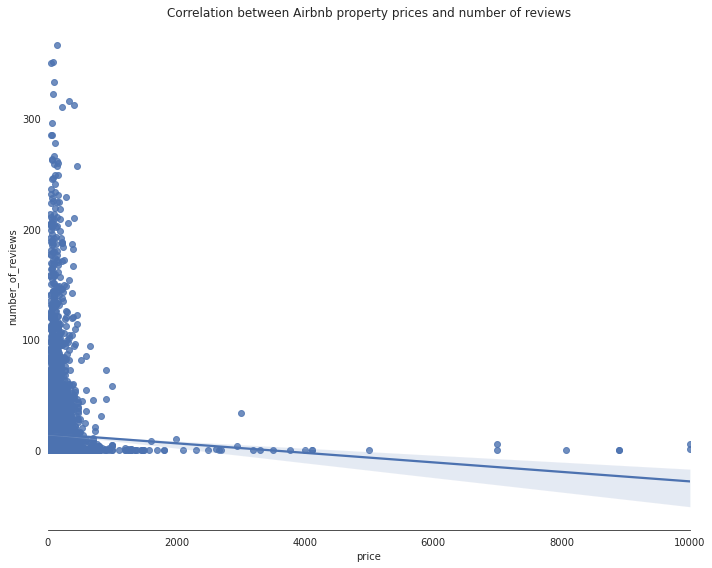

In [19]:
f, ax = plt.subplots(figsize=(10,8))
ax.xaxis.grid(False)
sns.regplot(x=df_listings['price'],y=df_listings['number_of_reviews'],fit_reg=True)
ax.set(title='Correlation between Airbnb property prices and number of reviews')
sns.despine(left=True,trim=True)
plt.tight_layout()
plt.show()

### The properties with high number of reviews comes from those priced below 2000 SGD. Hence, for the ETL section, we will filter out those Airbnb properties with very few reviews. 

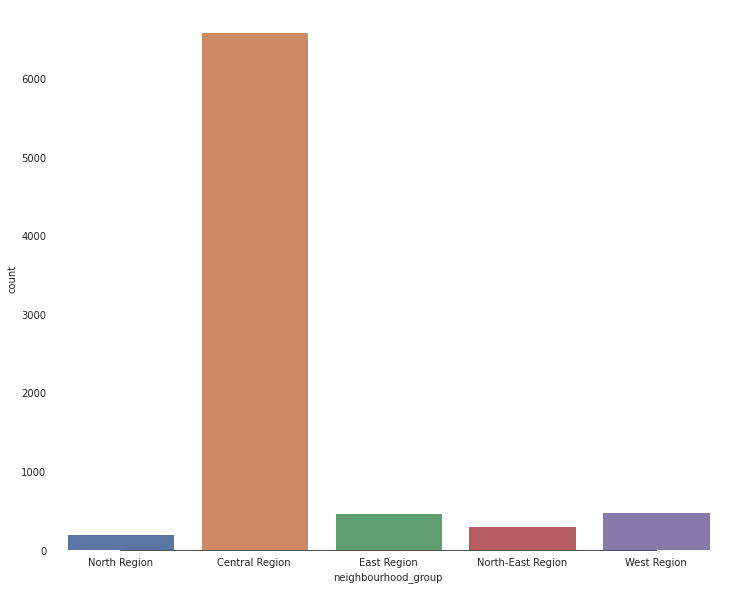

In [20]:
f, ax = plt.subplots(figsize=(12,10))
ax.xaxis.grid(False)
sns.countplot(df_listings['neighbourhood_group'])
sns.despine(trim=True,left=True)

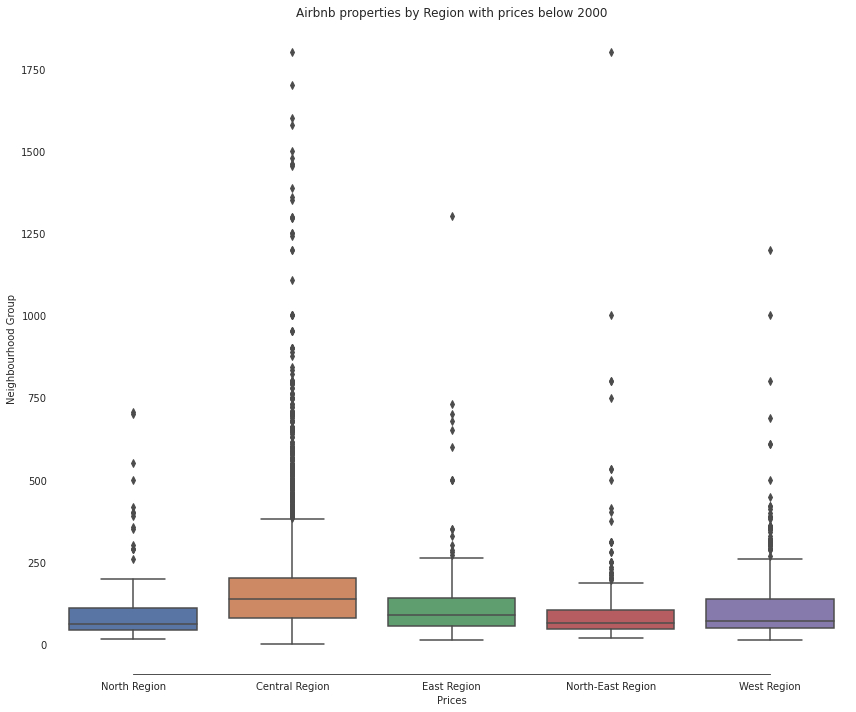

In [21]:
#Inspect distribuion of properties by regions and priced below 2000 SGD
prices_below2000 = df_listings[df_listings.price < 2000]
f, ax = plt.subplots(figsize=(12,10))
sns.boxplot(y='price',x='neighbourhood_group',data=prices_below2000)
ax.xaxis.grid(False)
ax.set(ylabel='Neighbourhood Group')
ax.set(xlabel='Prices')
ax.set(title="Airbnb properties by Region with prices below 2000")
sns.despine(trim=True,left=True)
plt.tight_layout()
plt.show()

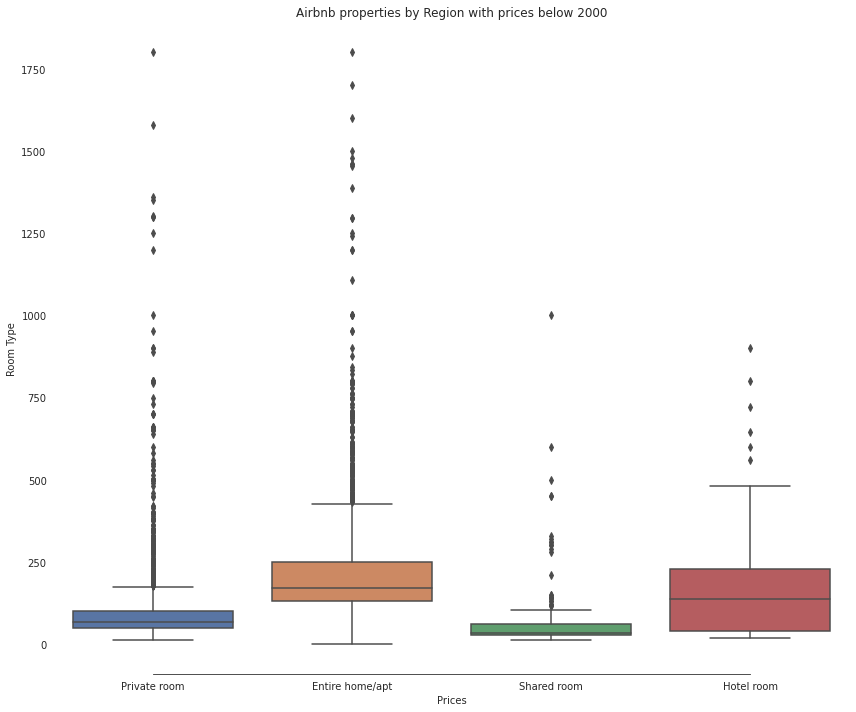

In [22]:
prices_below2000 = df_listings[df_listings.price < 2000]
f, ax = plt.subplots(figsize=(12,10))
sns.boxplot(y='price',x='room_type',data=prices_below2000)
ax.xaxis.grid(False)
ax.set(ylabel='Room Type')
ax.set(xlabel='Prices')
ax.set(title="Airbnb properties by Region with prices below 2000")
sns.despine(trim=True,left=True)
plt.tight_layout()
plt.show()

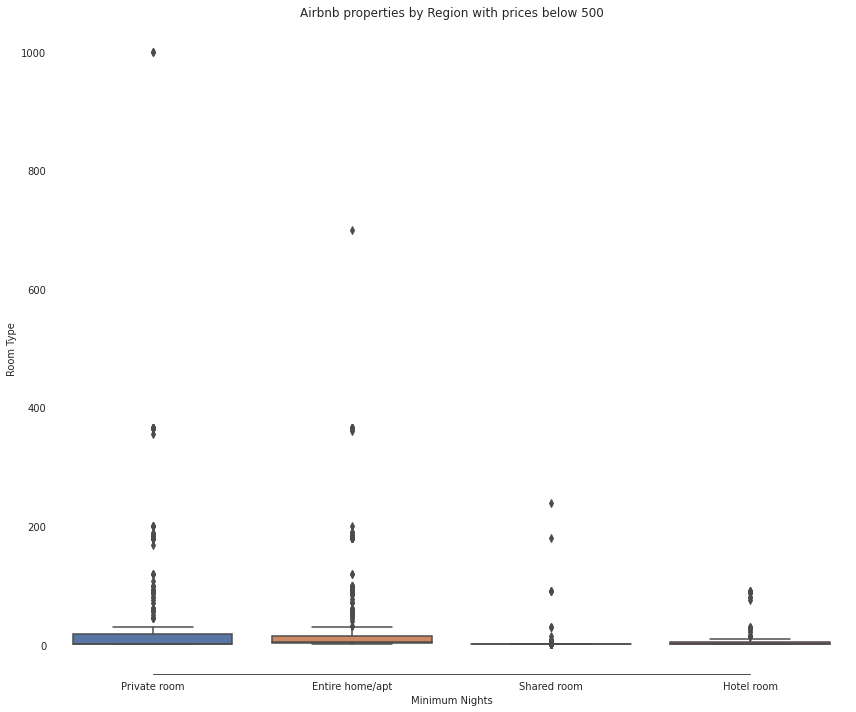

In [23]:
prices_below500 = df_listings[df_listings.price < 500]
f, ax = plt.subplots(figsize=(12,10))
sns.boxplot(y='minimum_nights',x='room_type',data=prices_below500)
ax.xaxis.grid(False)
ax.set(ylabel='Room Type')
ax.set(xlabel='Minimum Nights')
ax.set(title="Airbnb properties by Region with prices below 500")
sns.despine(trim=True,left=True)
plt.tight_layout()
plt.show()

### Now we can make use of the latitude and longitude values to perform a geospatial analysis of the Airbnb properties islandwide

In [0]:
import folium 
from folium.plugins import MarkerCluster

In [25]:
locations = df_listings[['latitude','longitude']]
locationlist = locations.values.tolist()
len(locationlist)

8047

In [0]:
#Identify locations of Airbnb properties on the Singapore Map
map = folium.Map(location=[1.44255,103.79580],tiles = 'Stamen Terrain',zoom_start=11)
marker_cluster1 = MarkerCluster().add_to(map)
for i in range(len(locationlist)):
  folium.Marker(locationlist[i]).add_to(marker_cluster1)

In [27]:
map

### From the map we can see that most of the properties are cluster near the central area of Singapore


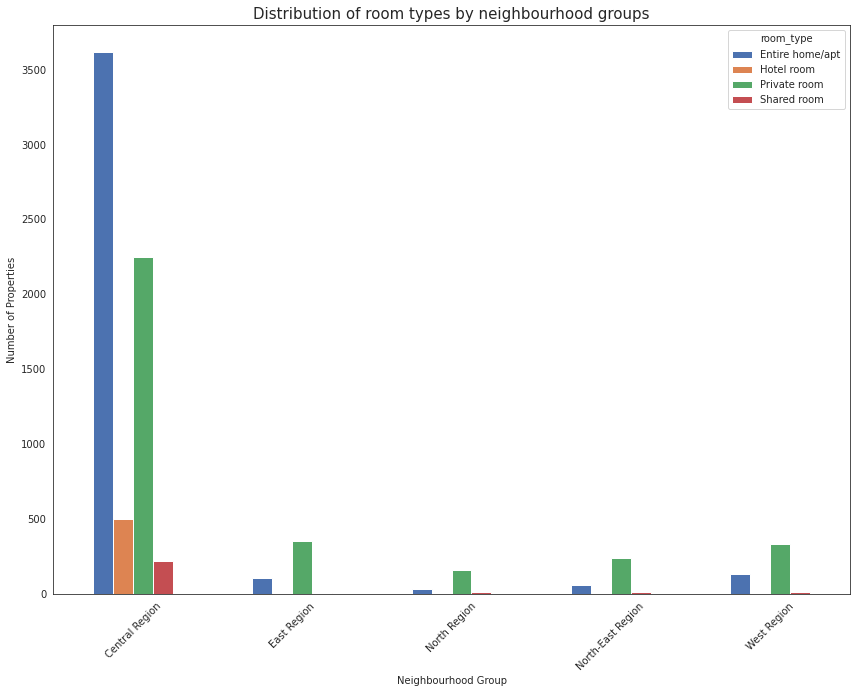

In [28]:
pd.crosstab(df_listings.neighbourhood_group,df_listings.room_type).plot(kind='bar',figsize=(12,10))
plt.title('Distribution of room types by neighbourhood groups',fontsize=15)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Properties')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

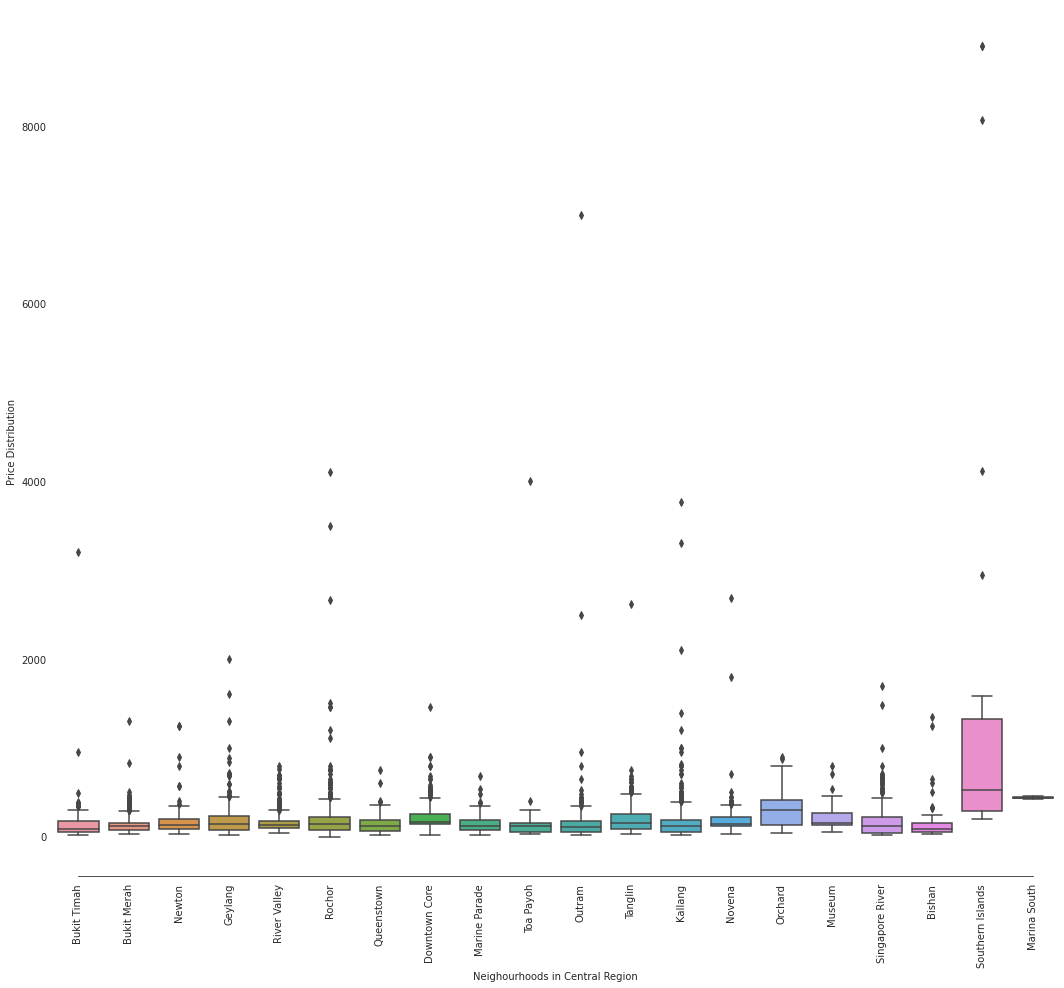

In [29]:
airbnb_central = df_listings[df_listings.neighbourhood_group == 'Central Region']
f,ax = plt.subplots(figsize=(18,16))
sns.boxplot(y='price',x='neighbourhood',data=airbnb_central)
ax.xaxis.grid(False)
ax.set(ylabel='Price Distribution')
ax.set(xlabel='Neighourhoods in Central Region')
plt.xticks(rotation=90)
sns.despine(trim=True, left=True)
plt.show()

In [30]:
airbnb_central_eh = airbnb_central[airbnb_central.room_type == 'Entire home/apt']
central_locations_eh = airbnb_central_eh[['latitude','longitude']]
central_locations_ehlist = central_locations_eh.values.tolist()
len(central_locations_ehlist)

3615

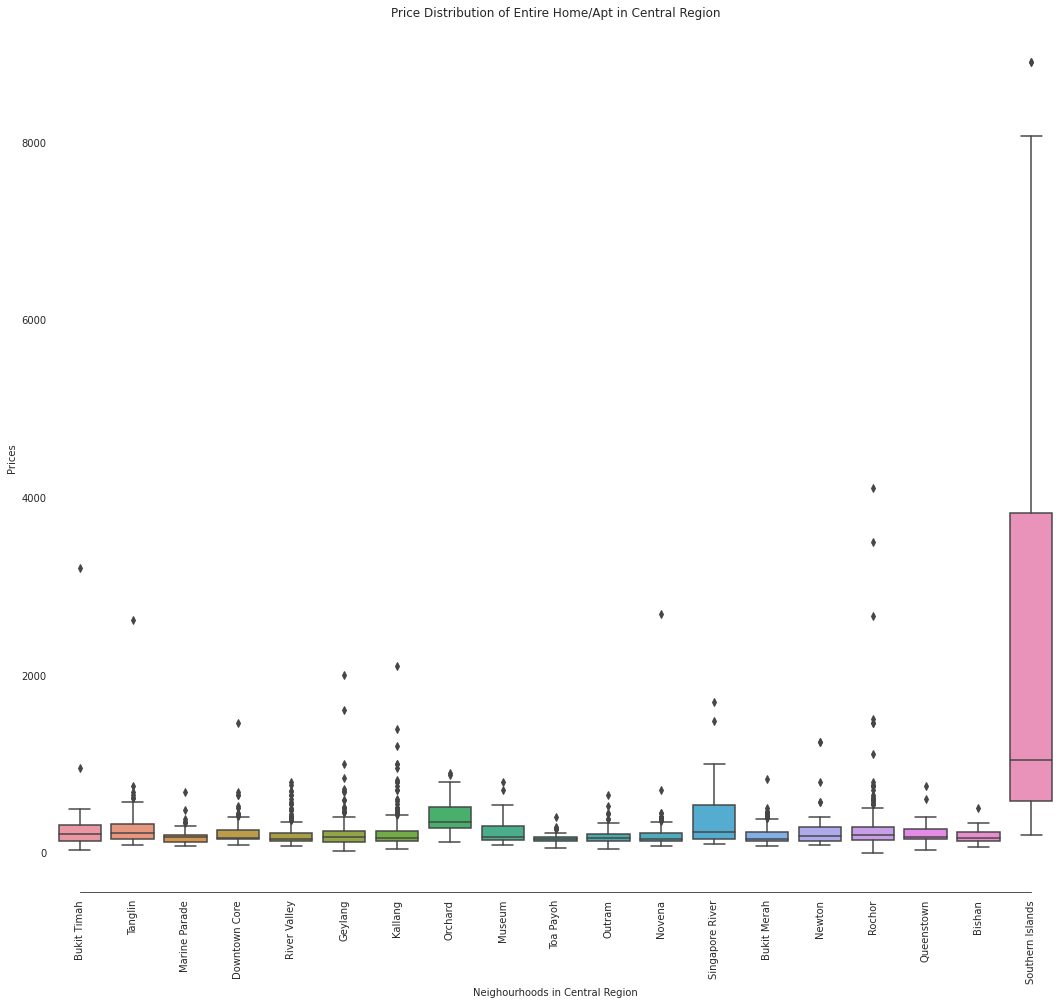

In [31]:
f,ax = plt.subplots(figsize=(18,16))
sns.boxplot(y='price',x='neighbourhood',data=airbnb_central_eh)
ax.xaxis.grid(False)
ax.set(title='Price Distribution of Entire Home/Apt in Central Region')
ax.set(ylabel='Prices')
ax.set(xlabel='Neighourhoods in Central Region')
plt.xticks(rotation=90)
sns.despine(trim=True, left=True)
plt.show()

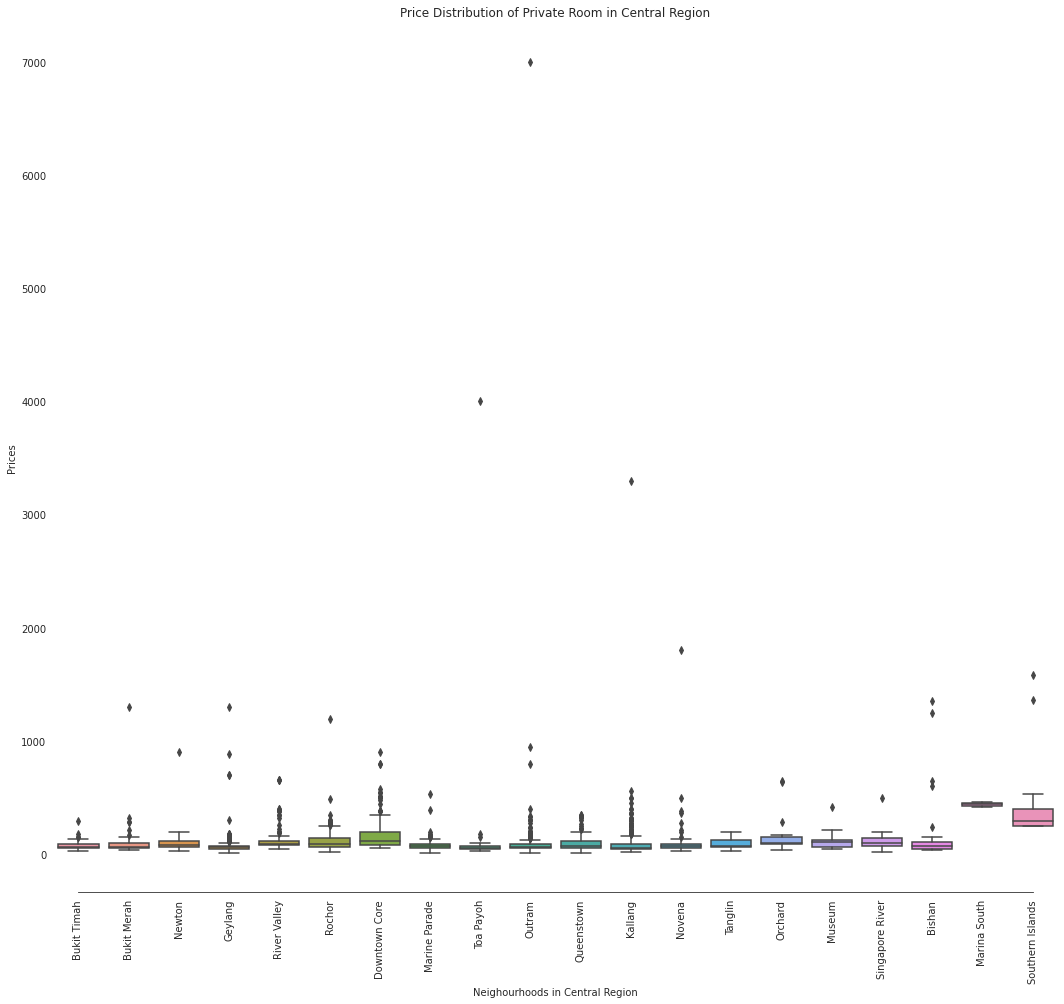

In [32]:
airbnb_central_pr = airbnb_central[airbnb_central.room_type == 'Private room']
f,ax = plt.subplots(figsize=(18,16))
sns.boxplot(y='price',x='neighbourhood',data=airbnb_central_pr)
ax.xaxis.grid(False)
ax.set(title='Price Distribution of Private Room in Central Region')
ax.set(ylabel='Prices')
ax.set(xlabel='Neighourhoods in Central Region')
plt.xticks(rotation=90)
sns.despine(trim=True, left=True)
plt.show()

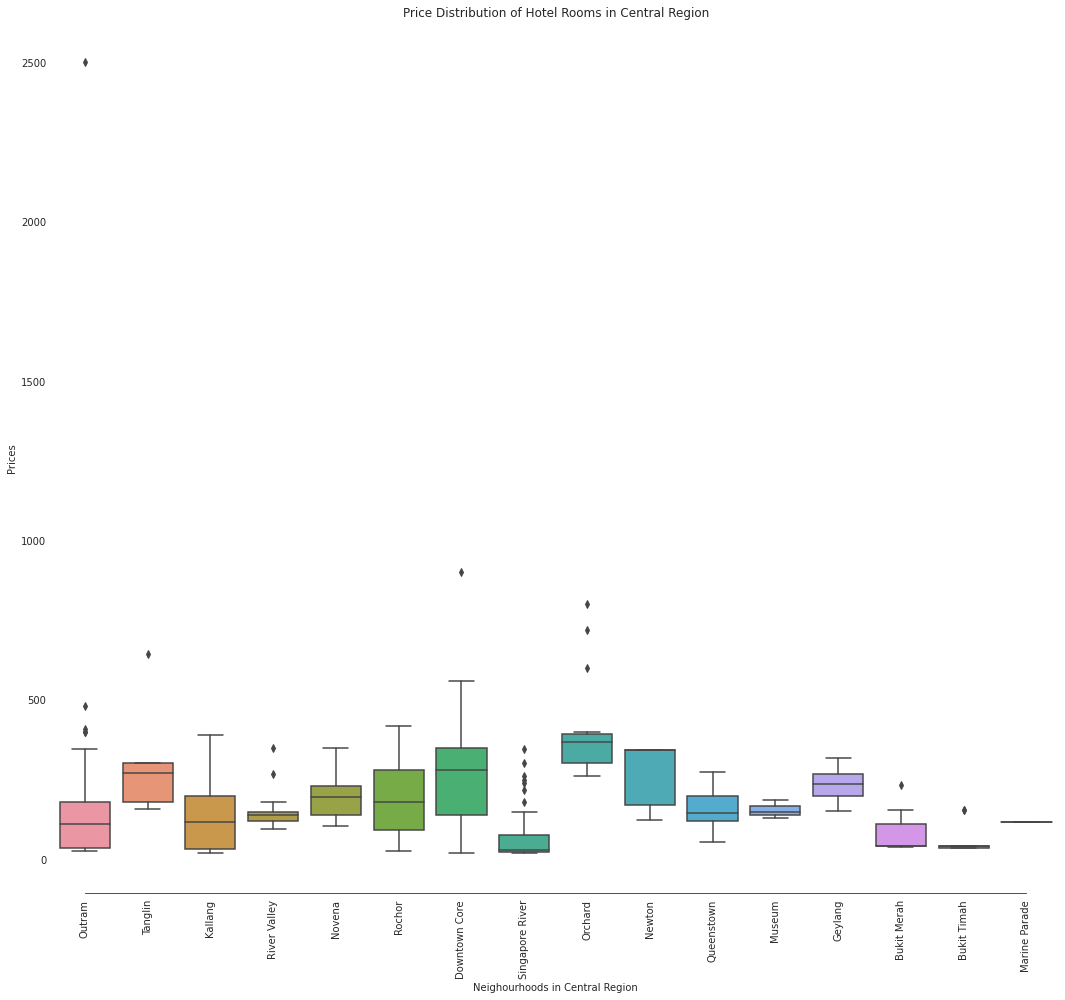

In [33]:
airbnb_central_hr = airbnb_central[airbnb_central.room_type == 'Hotel room']
f,ax = plt.subplots(figsize=(18,16))
sns.boxplot(y='price',x='neighbourhood',data=airbnb_central_hr)
ax.xaxis.grid(False)
ax.set(title='Price Distribution of Hotel Rooms in Central Region')
ax.set(ylabel='Prices')
ax.set(xlabel='Neighourhoods in Central Region')
plt.xticks(rotation=90)
sns.despine(trim=True, left=True)
plt.show()

In [34]:
#Identify locations of Airbnb properties on the Singapore Map
map1 = folium.Map(location=[1.44255,103.79580],zoom_start=11)
marker_cluster = MarkerCluster().add_to(map1)
for i in range(len(central_locations_ehlist)):
  folium.Marker(central_locations_ehlist[i]).add_to(marker_cluster)
map1

#### From the marker cluster map, we can see that most of the properties by which the room types is the Entire Home/Apartment is located at the central area where most of the shopping centres are located such as Kallang , Bugis and Orchard

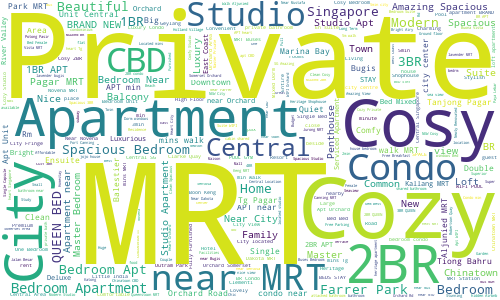

In [35]:
#wordcloud of names
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
stopwords  = set(STOPWORDS)
stopwords.update(["Room"]) #Add room to list of stopwords as it is commonly used term 
text = " ".join(str(x) for x in df_listings.name)
wc = WordCloud(width=500, height=300,max_words = 300,contour_width = 2,contour_color = 'steelblue',stopwords = stopwords, background_color ='white').generate(text)
wc.to_image()

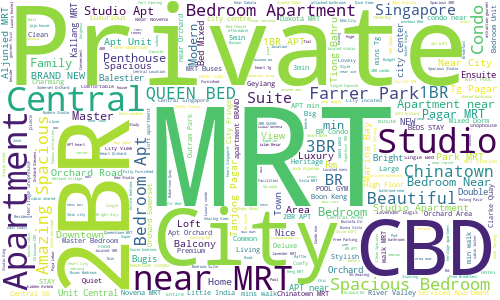

In [39]:
stopwords  = set(STOPWORDS)
stopwords.update(["Room","Cosy","Cozy"]) #Add room to list of stopwords as it is commonly used term 
text = " ".join(str(x) for x in airbnb_central.name)
wc = WordCloud(width=500, height=300,max_words = 300,contour_width = 2,contour_color = 'steelblue',stopwords = stopwords, background_color ='white').generate(text)
wc.to_image()

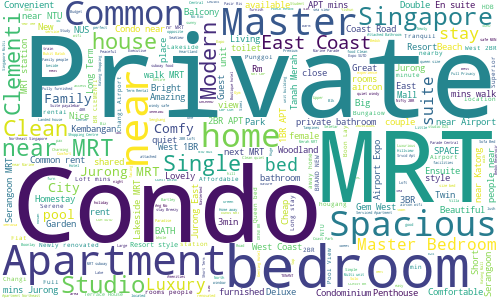

In [40]:
airbnb_noncentral = df_listings[df_listings.neighbourhood_group != 'Central Region']
stopwords  = set(STOPWORDS)
stopwords.update(["Room","Cosy","Cozy"]) #Add room to list of stopwords as it is commonly used term 
text = " ".join(str(x) for x in airbnb_noncentral.name)
wc = WordCloud(width=500, height=300,max_words = 300,contour_width = 2,contour_color = 'steelblue',stopwords = stopwords, background_color ='white').generate(text)
wc.to_image()

#### From the word cloud, the common terms used in promoting their Airbnb services focuses more on the location near the MRT and the comfort of the room or home apartment

### For the ETL section we will impute missing values as well as enrich with additional features such as distance of location to the nearest train (MRT) station

In [0]:
import plotly.express as px

In [42]:
fig = px.scatter_mapbox(airbnb_central_eh, lat="latitude", lon="longitude", hover_name="name", hover_data=["host_name", "room_type", "minimum_nights","price"], zoom=10, height=600,color="room_type", size="minimum_nights",
                  color_continuous_scale=px.colors.diverging, size_max=20)
fig.update_layout(mapbox_style="stamen-terrain")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [0]:
fig = px.scatter_mapbox(airbnb_central_pr, lat="latitude", lon="longitude", hover_name="name", hover_data=["host_name", "room_type", "minimum_nights","price"], zoom=10, height=600,color="room_type", size="minimum_nights",
                  color_continuous_scale=px.colors.diverging, size_max=20)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [43]:
fig = px.scatter_mapbox(airbnb_noncentral, lat="latitude", lon="longitude", hover_name="name", hover_data=["host_name", "room_type", "minimum_nights","price"], zoom=10, height=600,color="room_type", size="minimum_nights",
                  color_continuous_scale=px.colors.diverging, size_max=20)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## ETL and Feature Engineering

#### My next step will preparing the data to develop the predictive model. In addition, I will add an additional variable from another dataset to determine the distance of each Airbnb property to the nearest train station. In Singapore context, it is also known as the MRT (Mass Rapit Transit) and LRT (Light Rapid Transit)

### I will be using the MRT data from the link below 
https://raw.githubusercontent.com/hxchua/datadoubleconfirm/master/datasets/mrtsg.csv  . 

### Credits given to Hui Xiang Chua from Data Double Confirm. 

In [44]:
#Inspect the data again for any missing values
df_listings.isnull().sum()

id                                   0
name                                 2
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2927
reviews_per_month                 2927
calculated_host_listings_count       0
availability_365                     0
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/utils.py:287: UserWarning:

Use the colorbar set_ticks() method instead.



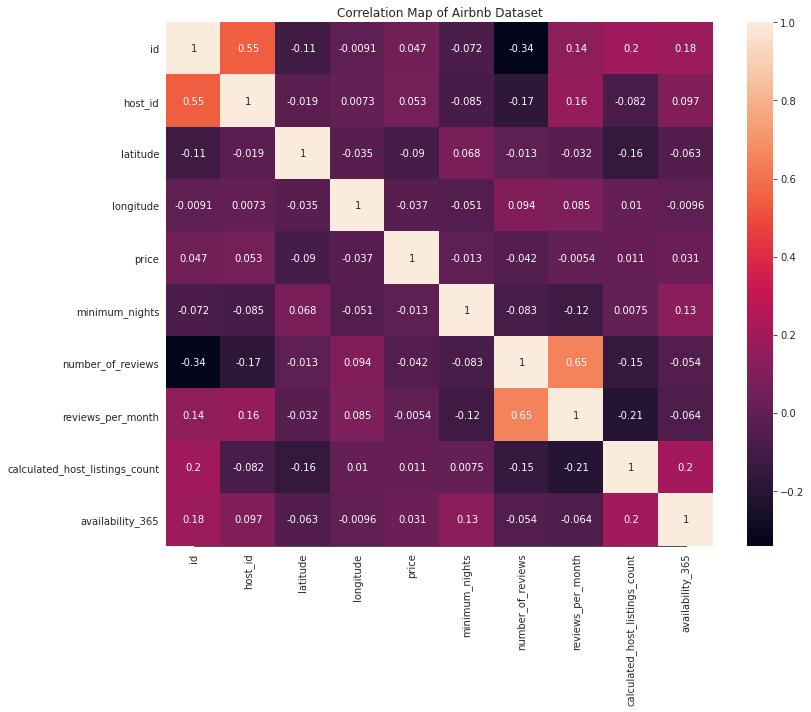

In [45]:
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(df_listings.corr(), annot=True)
ax.set(title='Correlation Map of Airbnb Dataset')
ax.xaxis.grid(False)
sns.despine(left=True,trim=True)
plt.tight_layout()
plt.show()

### Since number of reviews and reviews per month have a strong correlation with each other, we can choose to drop one of them. For this case, we will drop the review per month as there are missing values

In [0]:
#Drop the columns which are not required for the analysis and predictive model
df_listings.drop(['id','name','host_id','host_name','last_review','reviews_per_month'],axis=1,inplace=True)

In [47]:
df_listings.head()

neighbourhood_group  ... availability_365
0        North Region  ...              365
1      Central Region  ...              365
2        North Region  ...              365
3         East Region  ...              365
4         East Region  ...              365

[5 rows x 10 columns]

#### Import MRT dataset 

In [48]:
!wget https://raw.githubusercontent.com/hxchua/datadoubleconfirm/master/datasets/mrtsg.csv 

--2020-03-24 13:17:41--  https://raw.githubusercontent.com/hxchua/datadoubleconfirm/master/datasets/mrtsg.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15533 (15K) [text/plain]
Saving to: ‘mrtsg.csv’

mrtsg.csv           100%[===================>]  15.17K  --.-KB/s    in 0.01s   

2020-03-24 13:17:41 (1.21 MB/s) - ‘mrtsg.csv’ saved [15533/15533]



In [49]:
mrt_data = pd.read_csv('mrtsg.csv')
mrt_data.head()

OBJECTID                STN_NAME STN_NO  ...  Latitude   Longitude   COLOR
0        12   ADMIRALTY MRT STATION   NS10  ...  1.440585  103.800998     RED
1        16    ALJUNIED MRT STATION    EW9  ...  1.316433  103.882893   GREEN
2        33  ANG MO KIO MRT STATION   NS16  ...  1.369933  103.849553     RED
3        81       BAKAU LRT STATION    SE3  ...  1.388093  103.905418  OTHERS
4        80     BANGKIT LRT STATION    BP9  ...  1.380018  103.772667  OTHERS

[5 rows x 8 columns]

In [0]:
#Import geopy distance calculator
from geopy.distance import geodesic

In [0]:
def nearest_distance(nb_row, mrt_lrt):
  """
  The following function calculates the distance 
  of each Airbnb property to the nearest MRT or LRT
  """
  pass
  nb_lat , nb_long = nb_row[['latitude','longitude']]
  min_distance = 9999.00
  for stn_lat , stn_lng in zip(mrt_data['Latitude'],mrt_data['Longitude']):
    distance = geodesic((nb_lat,nb_long),(stn_lat,stn_lng)).km
    if distance < min_distance:
      min_distance = distance 
  return min_distance

In [52]:
%%time
df_listings['distance_to_nearest_stn'] = df_listings.apply(nearest_distance, axis=1,mrt_lrt = mrt_data)

CPU times: user 4min 46s, sys: 55.3 ms, total: 4min 46s
Wall time: 4min 47s


In [53]:
df_listings.head()

neighbourhood_group neighbourhood  ...  availability_365  distance_to_nearest_stn
0        North Region     Woodlands  ...               365                 0.617939
1      Central Region   Bukit Timah  ...               365                 0.397868
2        North Region     Woodlands  ...               365                 0.524388
3         East Region      Tampines  ...               365                 0.486465
4         East Region      Tampines  ...               365                 0.479073

[5 rows x 11 columns]

/usr/local/lib/python3.6/dist-packages/seaborn/utils.py:287: UserWarning:

Use the colorbar set_ticks() method instead.



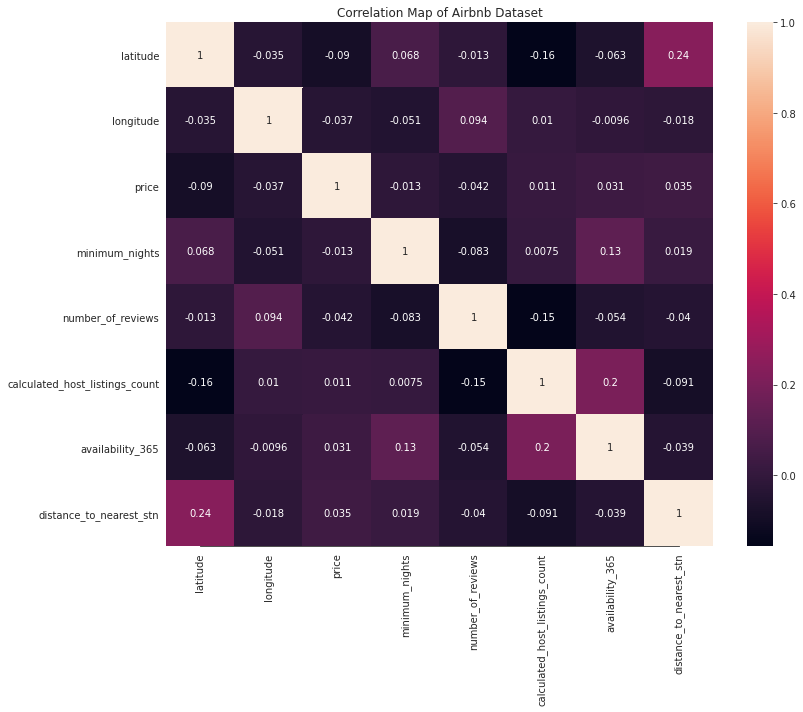

In [54]:
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(df_listings.corr(), annot=True)
ax.set(title='Correlation Map of Airbnb Dataset')
ax.xaxis.grid(False)
sns.despine(left=True,trim=True)
plt.tight_layout()
plt.show()

In [55]:
df_listings.describe()

latitude    longitude  ...  availability_365  distance_to_nearest_stn
count  8047.000000  8047.000000  ...       8047.000000              8047.000000
mean      1.313418   103.848927  ...        220.874115                 0.524526
std       0.030409     0.041647  ...        147.731172                 0.386795
min       1.243870   103.646560  ...          0.000000                 0.004443
25%       1.296025   103.838185  ...         75.000000                 0.266943
50%       1.311000   103.850310  ...        297.000000                 0.436837
75%       1.321465   103.867417  ...        363.000000                 0.661399
max       1.454590   103.973420  ...        365.000000                 7.932300

[8 rows x 8 columns]

In [57]:
df_listings[df_listings.distance_to_nearest_stn > 3]

neighbourhood_group  ... distance_to_nearest_stn
1093      Central Region  ...                3.093060
1502         West Region  ...                7.932300
4057        North Region  ...                3.984738
4827      Central Region  ...                3.042138
4862      Central Region  ...                3.342977

[5 rows x 11 columns]

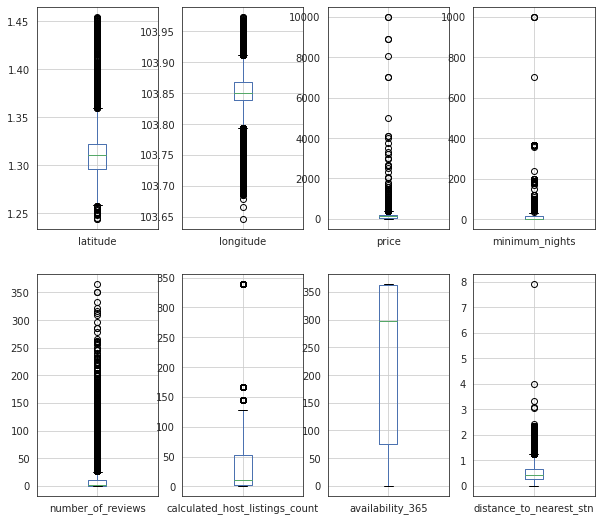

In [58]:
cols=['latitude','longitude','price','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365','distance_to_nearest_stn']
plt.figure(figsize=(10,9))
for i in range(1,9):
    
    plt.subplot(2,4,i)
    fig=df_listings.boxplot(column=cols[i-1])

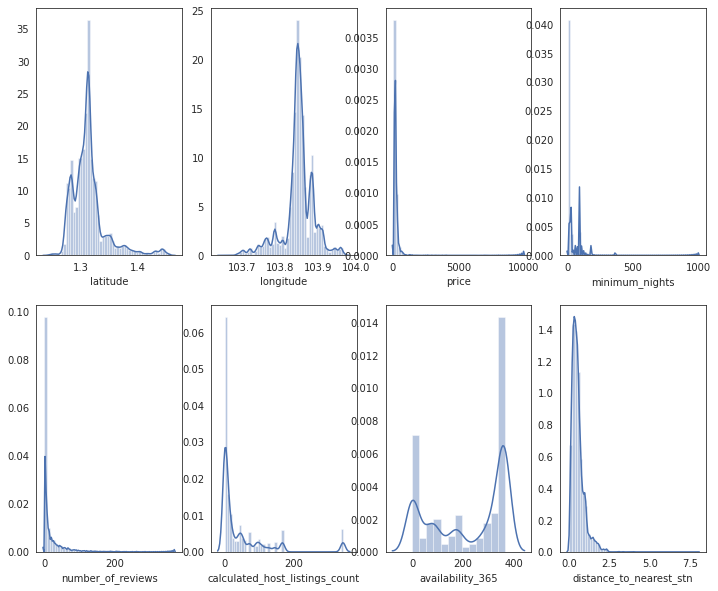

In [60]:
plt.figure(figsize=(12,10))
for j in range(1,9):
    plt.subplot(2,4,j)
    sns.distplot(df_listings[cols[j-1]])

In [61]:
#Identify the number of properties which do not have any reviews
df_listings[df_listings.number_of_reviews == 0]

neighbourhood_group  ... distance_to_nearest_stn
18        Central Region  ...                0.625220
24           East Region  ...                0.731819
27        Central Region  ...                0.312655
29        Central Region  ...                0.313054
30     North-East Region  ...                1.573927
...                  ...  ...                     ...
8042      Central Region  ...                0.031190
8043      Central Region  ...                0.031190
8044      Central Region  ...                0.031190
8045      Central Region  ...                0.219656
8046      Central Region  ...                0.219656

[2927 rows x 11 columns]

In [62]:
#Filter out data by which minimum nights is more than 365 days
df_listings = df_listings[df_listings.minimum_nights <= 365]
df_listings.shape

(8042, 11)

In [0]:
#Import statistical libraries to identify normality of variables
from scipy import stats
from scipy.stats import skew, norm

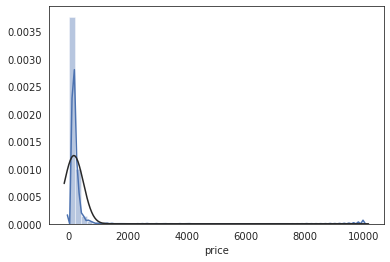

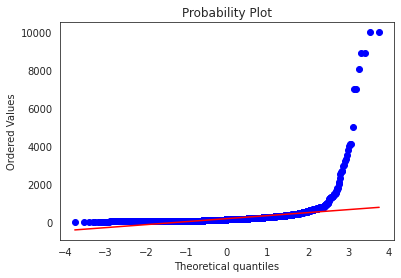

In [65]:
sns.distplot(df_listings['price'],fit=norm)
fig = plt.figure()
res = stats.probplot(df_listings['price'],plot=plt)

In [66]:
#Remove null values of price for normalization
df_listings = df_listings[df_listings.price > 0]
df_listings.shape

(8041, 11)

In [0]:
df_listings['price'] = np.log(df_listings['price'])

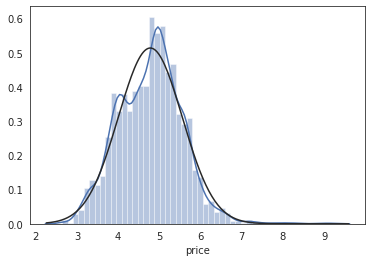

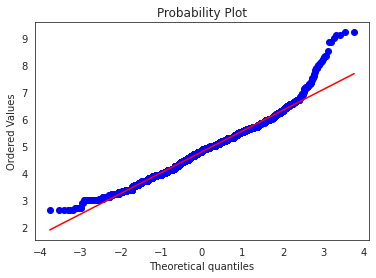

In [68]:
sns.distplot(df_listings['price'],fit=norm)
fig = plt.figure()
res = stats.probplot(df_listings['price'],plot=plt)

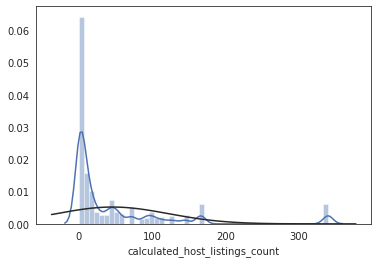

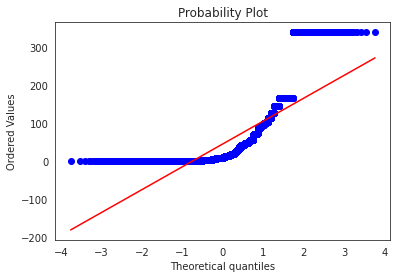

In [69]:
sns.distplot(df_listings['calculated_host_listings_count'],fit=norm)
fig = plt.figure()
res = stats.probplot(df_listings['calculated_host_listings_count'],plot=plt)

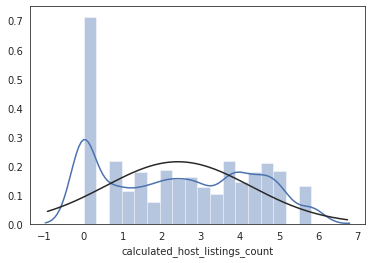

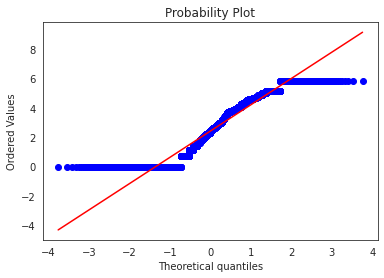

In [70]:
df_listings['calculated_host_listings_count'] = np.log(df_listings['calculated_host_listings_count'])
sns.distplot(df_listings['calculated_host_listings_count'],fit=norm)
fig = plt.figure()
res = stats.probplot(df_listings['calculated_host_listings_count'],plot=plt)

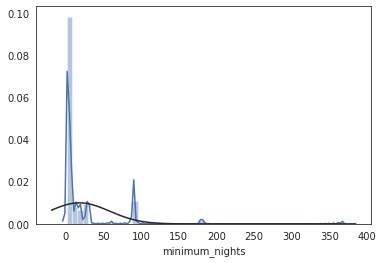

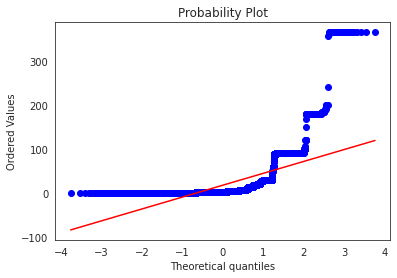

In [71]:
sns.distplot(df_listings['minimum_nights'],fit=norm)
fig = plt.figure()
res1 = stats.probplot(df_listings['minimum_nights'],plot=plt)

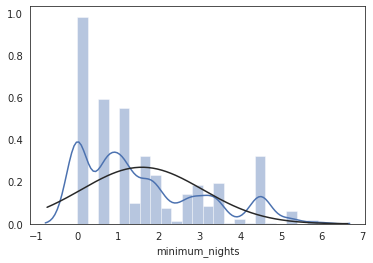

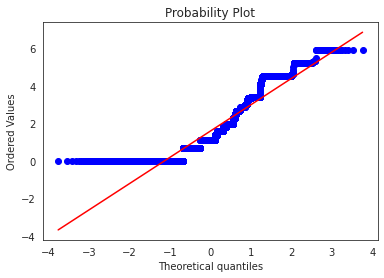

In [72]:
df_listings['minimum_nights'] = np.log(df_listings['minimum_nights'])
sns.distplot(df_listings['minimum_nights'],fit=norm)
fig = plt.figure()
res = stats.probplot(df_listings['minimum_nights'],plot=plt)

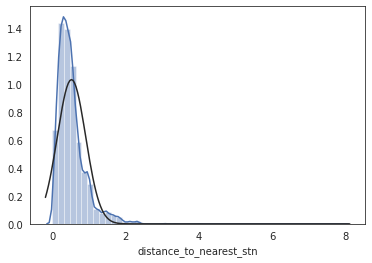

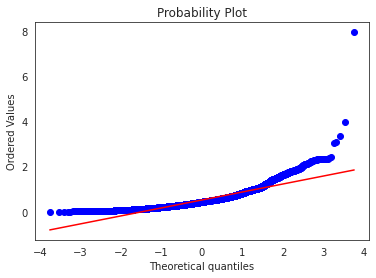

In [73]:
sns.distplot(df_listings['distance_to_nearest_stn'],fit=norm)
fig = plt.figure()
res = stats.probplot(df_listings['distance_to_nearest_stn'],plot=plt)

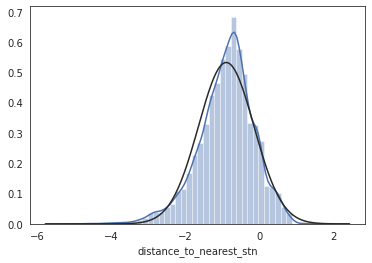

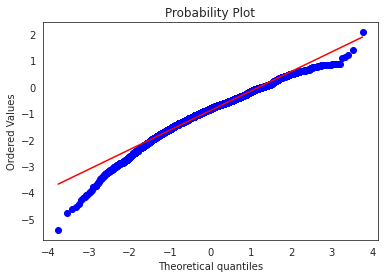

In [74]:
df_listings['distance_to_nearest_stn'] = np.log(df_listings['distance_to_nearest_stn'])
sns.distplot(df_listings['distance_to_nearest_stn'],fit=norm)
fig = plt.figure()
res = stats.probplot(df_listings['distance_to_nearest_stn'],plot=plt)

In [75]:
#for latitude
std=np.std(df_listings['latitude'])
mean=np.mean(df_listings['latitude'])
median=np.median(df_listings['latitude'])
outliers=[]
for x in df_listings['latitude']:
    zscore=(x-mean)/std
    if zscore>abs(3):
        outliers.append(x)

len(outliers)

194

In [0]:
df_listings = df_listings.replace(outliers, median)

In [77]:
#for longitude
std=np.std(df_listings['longitude'])
mean=np.mean(df_listings['longitude'])
median=np.median(df_listings['longitude'])
outliers=[]
for x in df_listings['longitude']:
    zscore=(x-mean)/std
    if -3<zscore>3:
        outliers.append(x)

len(outliers)

0

### Encoding of categorical variables 

In [78]:
#Inspect the variables for room_type
df_listings['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

In [0]:
room_type_map = {'Private room' : 1, 'Entire home/apt': 2 , 'Shared room':3 ,'Hotel room' : 4}
df_listings['room_type'] = df_listings['room_type'].map(room_type_map)

In [80]:
df_listings.head()

neighbourhood_group neighbourhood  ...  availability_365  distance_to_nearest_stn
0        North Region     Woodlands  ...               365                -0.481366
1      Central Region   Bukit Timah  ...               365                -0.921634
2        North Region     Woodlands  ...               365                -0.645523
3         East Region      Tampines  ...               365                -0.720591
4         East Region      Tampines  ...               365                -0.735902

[5 rows x 11 columns]

In [81]:
df_listings['neighbourhood'].unique()

array(['Woodlands', 'Bukit Timah', 'Tampines', 'Bedok', 'Bukit Merah',
       'Newton', 'Geylang', 'River Valley', 'Serangoon', 'Jurong West',
       'Rochor', 'Queenstown', 'Downtown Core', 'Marine Parade',
       'Pasir Ris', 'Toa Payoh', 'Outram', 'Punggol', 'Tanglin',
       'Hougang', 'Kallang', 'Novena', 'Bukit Panjang', 'Mandai',
       'Orchard', 'Ang Mo Kio', 'Bukit Batok', 'Museum', 'Sembawang',
       'Choa Chu Kang', 'Singapore River', 'Jurong East', 'Clementi',
       'Sengkang', 'Bishan', 'Central Water Catchment', 'Yishun',
       'Southern Islands', 'Sungei Kadut', 'Western Water Catchment',
       'Tuas', 'Pioneer', 'Marina South', 'Lim Chu Kang'], dtype=object)

In [82]:
len(df_listings['neighbourhood'].unique())

44

In [83]:
df_listings['neighbourhood_group'].unique()

array(['North Region', 'Central Region', 'East Region',
       'North-East Region', 'West Region'], dtype=object)

In [0]:
#Label Encoding of Categorical Variables
from sklearn.preprocessing import LabelEncoder

In [0]:
le = LabelEncoder()
df_listings['neighbourhood'] = le.fit_transform(df_listings['neighbourhood'])

In [0]:
le = LabelEncoder()
df_listings['neighbourhood_group'] = le.fit_transform(df_listings['neighbourhood_group'])

In [87]:
df_listings.head()

neighbourhood_group  ...  distance_to_nearest_stn
0                    2  ...                -0.481366
1                    0  ...                -0.921634
2                    2  ...                -0.645523
3                    1  ...                -0.720591
4                    1  ...                -0.735902

[5 rows x 11 columns]

/usr/local/lib/python3.6/dist-packages/seaborn/utils.py:287: UserWarning:

Use the colorbar set_ticks() method instead.



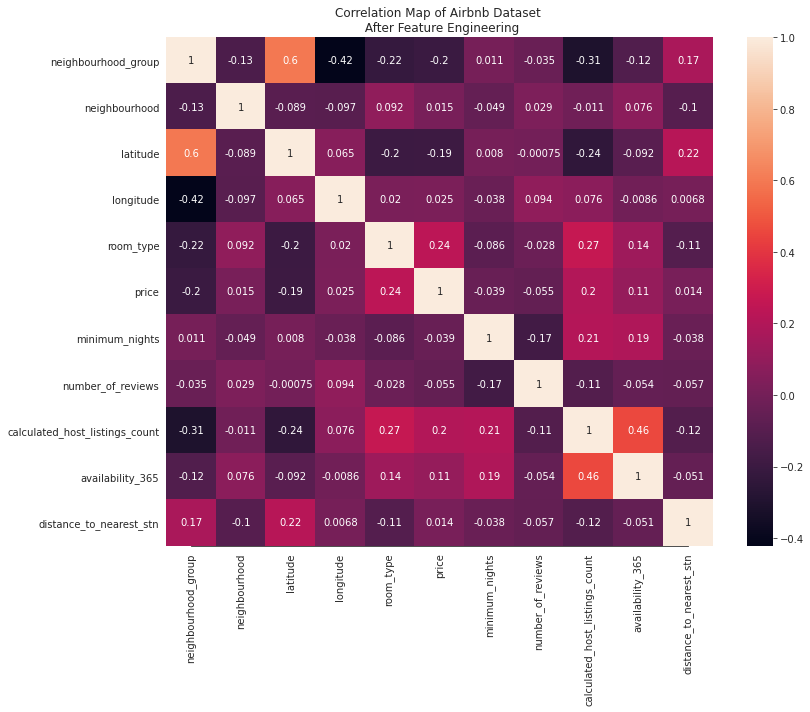

In [89]:
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(df_listings.corr(), annot=True)
ax.set(title='Correlation Map of Airbnb Dataset \n After Feature Engineering')
ax.xaxis.grid(False)
sns.despine(left=True,trim=True)
plt.tight_layout()
plt.show()

In [0]:
listing_model = df_listings.to_csv('listing_model.csv',index=False)
from google.colab import files
files.download('listing_model.csv')